## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [3]:
import tensorflow as tf
# YOUR CODE SHOULD START HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>=0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
# YOUR CODE SHOULD END HERE
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE SHOULD START HERE
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
# YOUR CODE SHOULD END HERE

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.2026 - acc: 0.9403
Epoch 2/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0793 - acc: 0.9758
Epoch 3/10
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0521 - acc: 0.9835
Epoch 4/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.0378 - acc: 0.9879
Epoch 5/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.0264 - acc: 0.9916
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 13s 215us/sample - loss: 0.0264 - acc: 0.9916


In [8]:
classifications = model.predict(x_test)

print(classifications[2])
print(y_test[0])

[2.02259565e-09 9.99945164e-01 1.30747376e-05 1.03103005e-07
 1.87419437e-06 7.99481228e-08 5.00740747e-08 3.41012928e-05
 5.50442564e-06 6.84149182e-09]
7


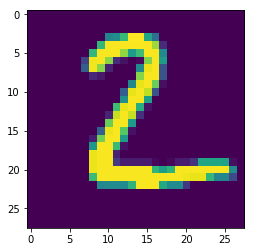

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1])